<a href="https://colab.research.google.com/github/tonnywilliam-svg/python/blob/main/bayes%20simulation%20with%20gui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
 
def Bayes(oDef):
  # preparation/utilities
  def chain(v0,*funcs):
    result=v0
    for f in funcs:
      result=f(result)
    return result
  
  def map(arr,*funcs):
    return [chain(e,*funcs) for e in arr]
 
  n=oDef['n']; successes_observed=oDef['successes_observed']; prior=oDef['prior']; simulation_size=oDef['simulation_size']
  simulate =lambda p: np.random.binomial(oDef['n'], p, simulation_size)
  simulation_match_reality_count = lambda simulations, reality=successes_observed: len([s for s in simulations if s==reality])
  
  normalize = lambda arr: [e/sum(arr) for e in arr]
  plot = lambda ys: plt.plot(prior,ys); plt.show()
  # simulate and plotting
  posterior0 =map(prior, simulate, simulation_match_reality_count)
  chain(posterior0, normalize, plot)

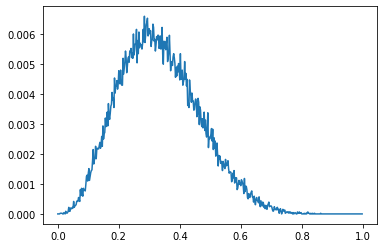

In [5]:
#@title Number fields
trial_size = 10 #@param {type:"integer"}
success_observed =  3#@param {type:"integer"}

inputs_to_bayes = {
    'model':'binomial', 'n':trial_size, 'successes_observed':success_observed, 
    'prior':[i/500 for i in range(500)],
    'simulation_size':1000
}
 
Bayes(inputs_to_bayes)

# New Section